<a href="https://colab.research.google.com/github/krishnakaushik25/DataQuest-Guided-Projects/blob/main/Finding_heavy_traffic_indicators_I_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze for heavy traffic indicators (I-94)

## Introduction

### Data Set

The data set used is based on the interstate highway I-94 westbound traffic data collected by John Hugue.
Availablefrom the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).
The data has been recorder on hourly basis from a traffic station (MN DoT ATR station 301), located midway between Minneapolis and St Paul, MN. 
Weather features and holidays included for impacts on traffic volume. 


### Goal of analysis

We would like to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Load Data & Data Set basic info

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')


In [ ]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

## Examine traffic_volume column

Analyse the traffic volume distribution

Text(0.5, 0, 'Traffic volume [cars/hr]')

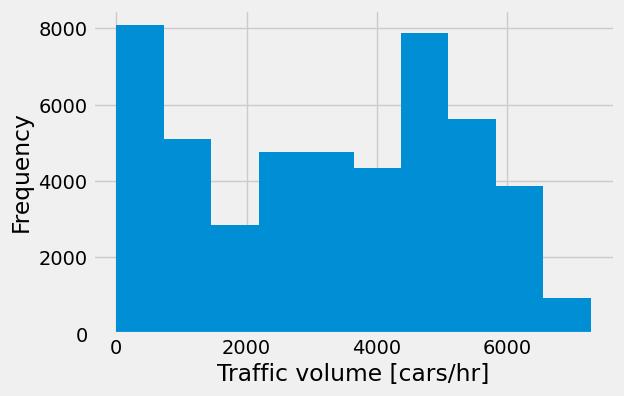

In [ ]:
df.traffic_volume.plot.hist()
plt.xlabel('Traffic volume [cars/hr]')

In [ ]:
df.traffic_volume.value_counts(normalize=True,bins=10).sort_index()

(-7.281000000000001, 728.0]    0.167932
(728.0, 1456.0]                0.105800
(1456.0, 2184.0]               0.058813
(2184.0, 2912.0]               0.098851
(2912.0, 3640.0]               0.098768
(3640.0, 4368.0]               0.090221
(4368.0, 5096.0]               0.163596
(5096.0, 5824.0]               0.116878
(5824.0, 6552.0]               0.079952
(6552.0, 7280.0]               0.019189
Name: traffic_volume, dtype: float64

In [ ]:
df.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Observations:
- The traffic volume seems to be evenly distributed from 0-7000 cars/hr
- it contains two peaks ~8000 incidences values 0-500 cars/hr and 4500-5000 cars/hr
- max values is 7280 cars/hr, min is 0 cars/hr
- AVG traffic is 3250 cars/hr, median is 3380 cars/hr

## Compare night vs day traffic volumes

In [ ]:
# create boolean mask to detect day time (6-18h) and night time (18-6h)
daytime = (df.date_time.dt.hour >= 7) & (df.date_time.dt.hour <= 19)
nighttime = (df.date_time.dt.hour >= 19) | (df.date_time.dt.hour <= 7)

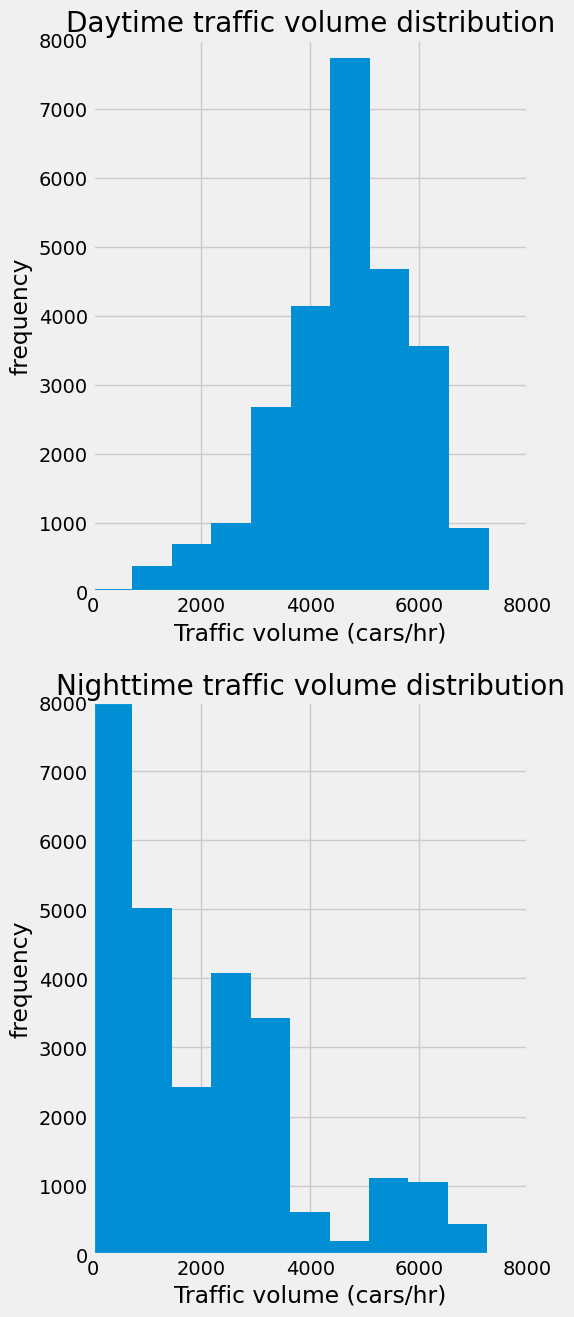

In [ ]:
plt.figure(figsize=(5,15))
plt.subplot(2,1,1)
plt.hist(df['traffic_volume'][daytime])
plt.title('Daytime traffic volume distribution')
plt.xlabel('Traffic volume (cars/hr)')
plt.ylabel('frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(2,1,2)
plt.hist(df['traffic_volume'][nighttime])
plt.title('Nighttime traffic volume distribution')
plt.xlabel('Traffic volume (cars/hr)')
plt.ylabel('frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()


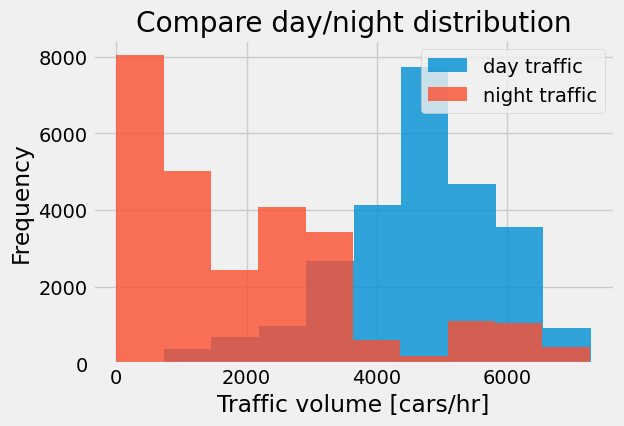

In [ ]:
plt.figure()
plt.hist(df['traffic_volume'][daytime],label='day traffic',alpha=0.8)
plt.hist(df['traffic_volume'][nighttime],label='night traffic',alpha=0.8)
plt.legend()
plt.title('Compare day/night distribution')
plt.xlabel('Traffic volume [cars/hr]')
plt.ylabel('Frequency')
plt.show()


Observations:
- Day traffic shows left skewed distribution (centered around 5k cars/hr)
-Night traffic shows right skewed distribution (centered around 500 cars/hr)

<br>Conclusion:
- night intervalls could be skipped, or at least the low traffic volume part of it < 3000 cars/hr

## Compare average traffic by month

In [ ]:
# create copy of data via boolean mask to detect day time (6-18h)
day   = df.copy()[(df.date_time.dt.hour >= 7) & (df.date_time.dt.hour <= 19)]
night = df.copy()[(df.date_time.dt.hour >= 19) | (df.date_time.dt.hour <= 7)]


Create month column to split data by month (groupby) and calculate then the average traffic per month

In [ ]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

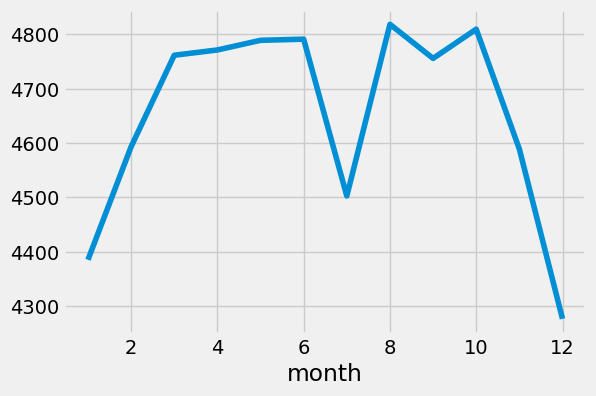

In [ ]:
by_month['traffic_volume'].plot()
plt.title('Avg traffic volume per month')
plt.xlable()

Observations:
- Generally speaking we observe heavier traffic from march-oct
- (1/Jan) (7/July) (12/Dec) show a further decrease of the avg traffic volume, which might be linked to vaccation time (summer, christmas,new year)

## Compare average traffic by weekday

Create dayofweek column to split data by week day (groupby) and calculate then the average traffic per weekday

In [ ]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
print(by_dayofweek['traffic_volume'])

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64


([<matplotlib.axis.XTick at 0x7f3c7ba46460>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

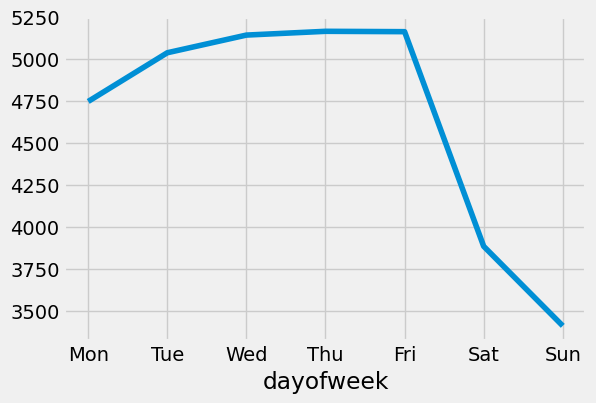

In [ ]:
by_dayofweek['traffic_volume'].plot()
plt.xticks([0,1,2,3,4,5,6],
           ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

Observations:
- Mon-Tuesday steady, with Monday slighlty lower traffic
- Sat/Sun are then much lower ~35%

## Compare average traffic by hour

Create hour column to split data by hour (groupby) and calculate then the average traffic per hour on business days and on weekends

In [ ]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


Calculate weekend traffic volume normalized by weekdays traffic

In [ ]:
by_hour_weekend['traffic_volume'].mean() / by_hour_business['traffic_volume'].mean()

0.7274957033817455

Graph traffic from weekdays vs weekends (side by side)

(7.0, 19.0)

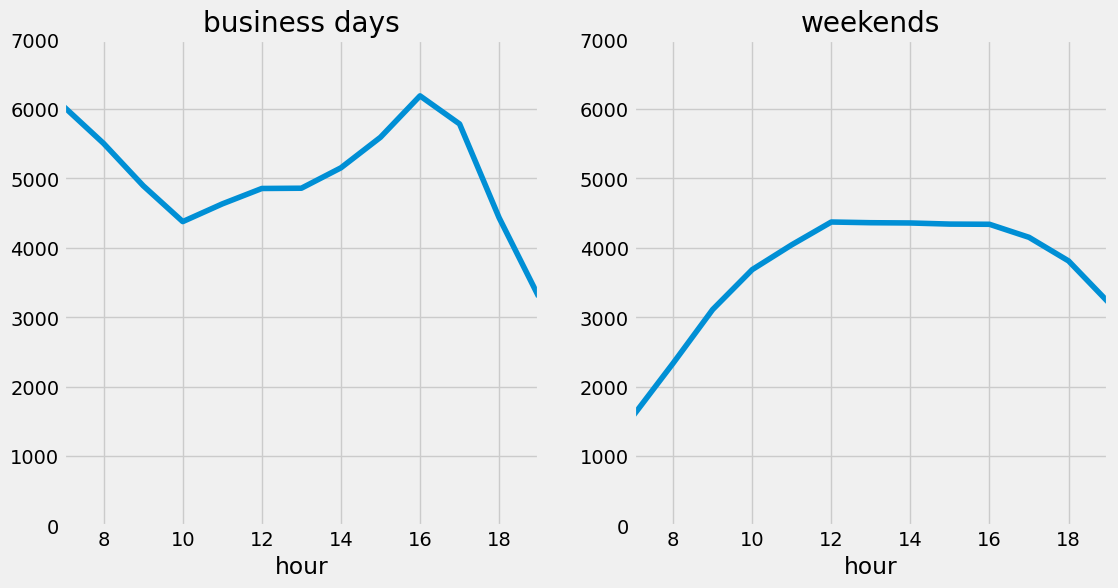

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('business days')
plt.ylim([0,7000])
plt.xlim([7,19])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.title('weekends')
plt.ylim([0,7000])
plt.xlim([7,19])

Graph traffic from weekdays vs weekends (in one graph)

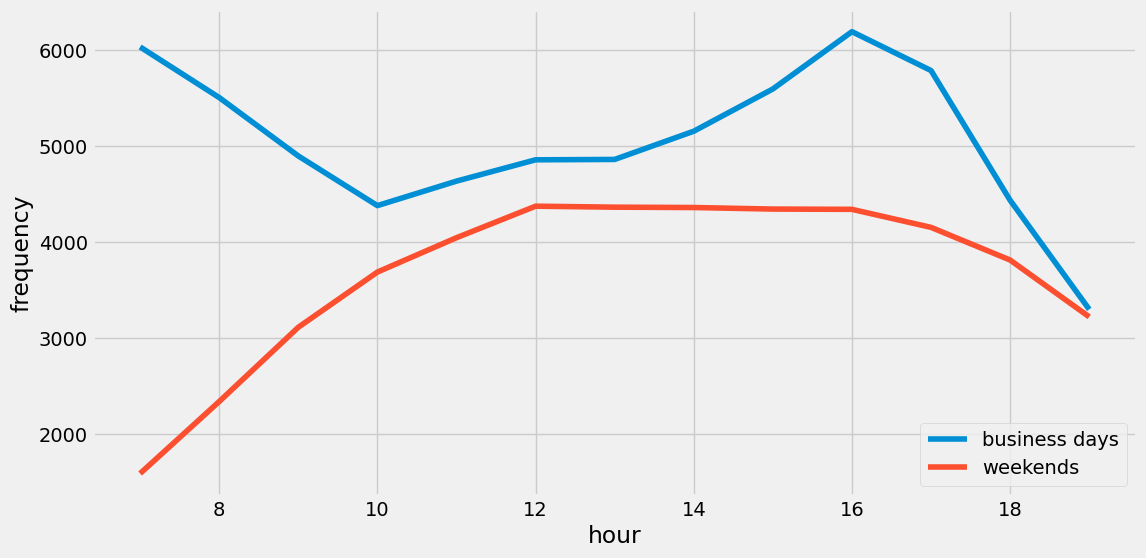

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(by_hour_business['traffic_volume'],label='business days')
plt.plot(by_hour_weekend['traffic_volume'],label='weekends')
plt.grid(True)
plt.legend()
plt.xlabel('hour')
plt.ylabel('frequency')
plt.show()

Observations:
- on business days we can observe two peak intervalls (7-9h) and (15-18h)
- weekends traffic is constant from 12-16h but much lower in morning and evening hours

### Visualize daytime traffic volume vs week day and hour

- Split daytime data (day) by week day
- For loop over week days spliting by hour and calculating average traffic volume

In [ ]:
pieces = dict(list(day.groupby(['dayofweek'])))

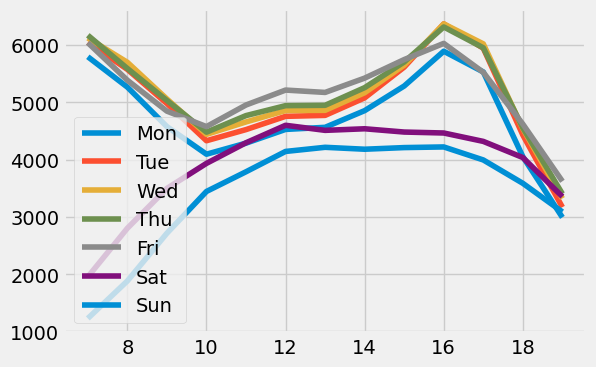

In [ ]:
wkdict = {0:'Mon',
          1:'Tue',
          2:'Wed',
          3:'Thu',
          4:'Fri',
          5:'Sat',
          6:'Sun'}

plt.figure()
for k in pieces:
    plt.plot(pieces[k].groupby('hour').mean()['traffic_volume'],label=wkdict[k])
    #plt.plot(pieces[k].groupby['hour'].mean()['traffic_volume'],label=k)
plt.legend()
plt.grid(True)
plt.show()

Observations:
- Confirms major influence of business day vs weekend
- Traffic volume seems to increas over week day Mon-Fri
- Highest peaks duringh rush hours (7h/16h) occur on Wednesday and Thursday

## Analyze weather related columns/signals influence on traffic volume

Calculate correlation of traffic_volume against weather indicating signals/columns (snow_1h, rain_1h, clouds_all, temp)

In [ ]:
day.drop(['holiday','date_time','month','dayofweek','hour'],axis=1).corrwith(day['traffic_volume']).abs().sort_values()

snow_1h           0.003768
rain_1h           0.004020
clouds_all        0.033410
temp              0.118084
traffic_volume    1.000000
dtype: float64

Cross-Plot (Scatter) the 3 highest correlated weather columns

<b> temp

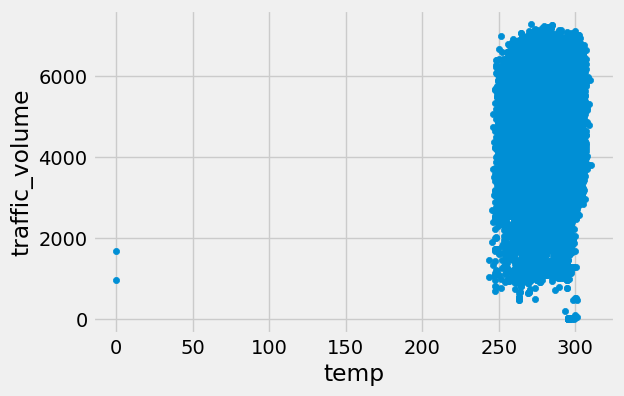

In [ ]:
day.plot.scatter(x='temp',y='traffic_volume')

<b> clouds_all

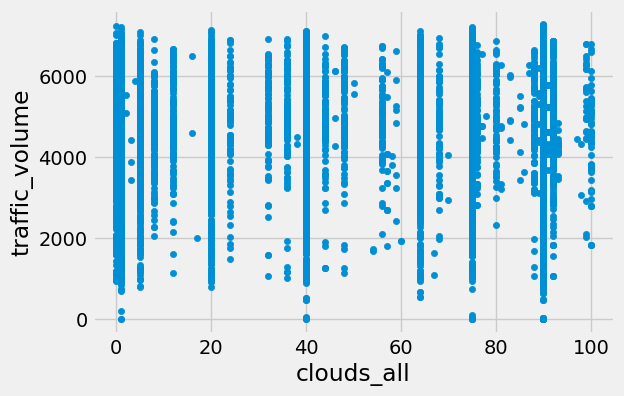

In [ ]:
day.plot.scatter(x='clouds_all',y='traffic_volume')

<b> rain_1h

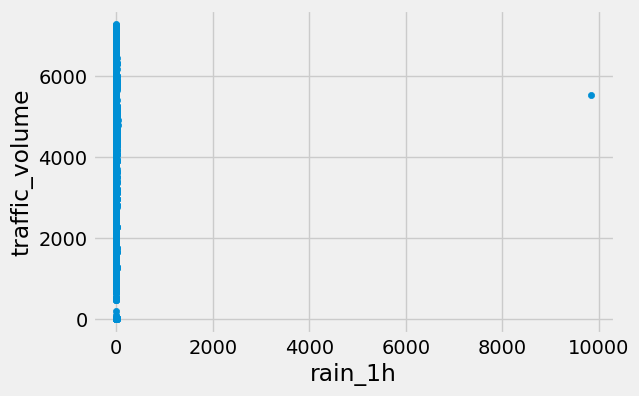

In [ ]:
day.plot.scatter(x='rain_1h',y='traffic_volume')

Observations:
- none of the scatter plots indicates a proper correlation, it is mostly based on outliers of varying data

Analyse temp signal vs Time

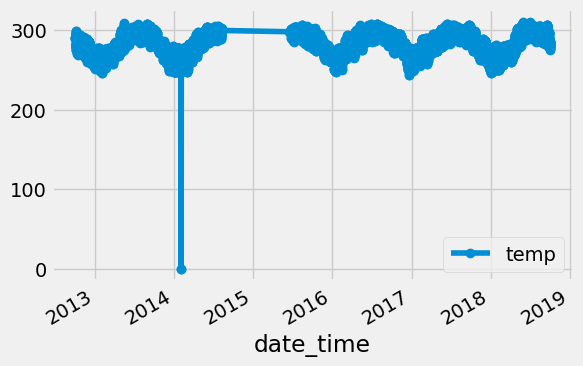

In [ ]:
day.plot(x='date_time',y='temp',marker='o')

Observations:
- looking at the time evolution of the DAY-temperatures (temp), we recognize that the signal is not recorded from mid/2014-mid/2016
- we observe some outlying values early/2014 (equal to 0), that create the high pearson correlation factor 

## Analyze influence of  weather states on average traffic volume

Split data by 'categorial' columns (weather_main, weather_description) and calculate averages of all columns

In [ ]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

Analyze main weather effects on average traffic volume

In [ ]:
by_weather_main['traffic_volume'].sort_values()

weather_main
Squall          4211.000000
Snow            4295.594612
Fog             4298.933511
Smoke           4447.307692
Thunderstorm    4512.479042
Mist            4530.901782
Haze            4545.434932
Clear           4661.666879
Rain            4686.953503
Drizzle         4712.699060
Clouds          4746.375927
Name: traffic_volume, dtype: float64

Graph main weather effect on average traffic flow (sorted)

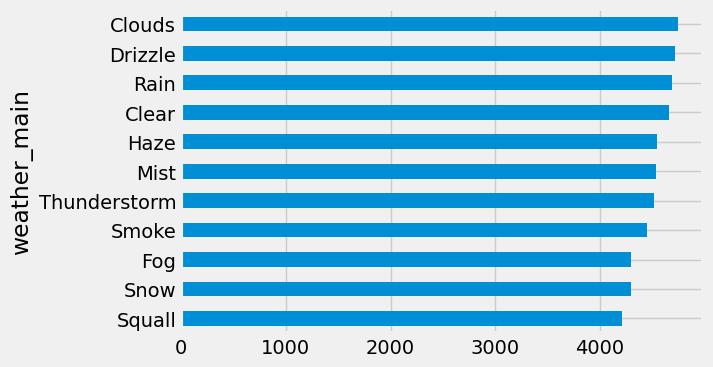

In [ ]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.grid(True)

Observations:
- no weather situation seems to stic

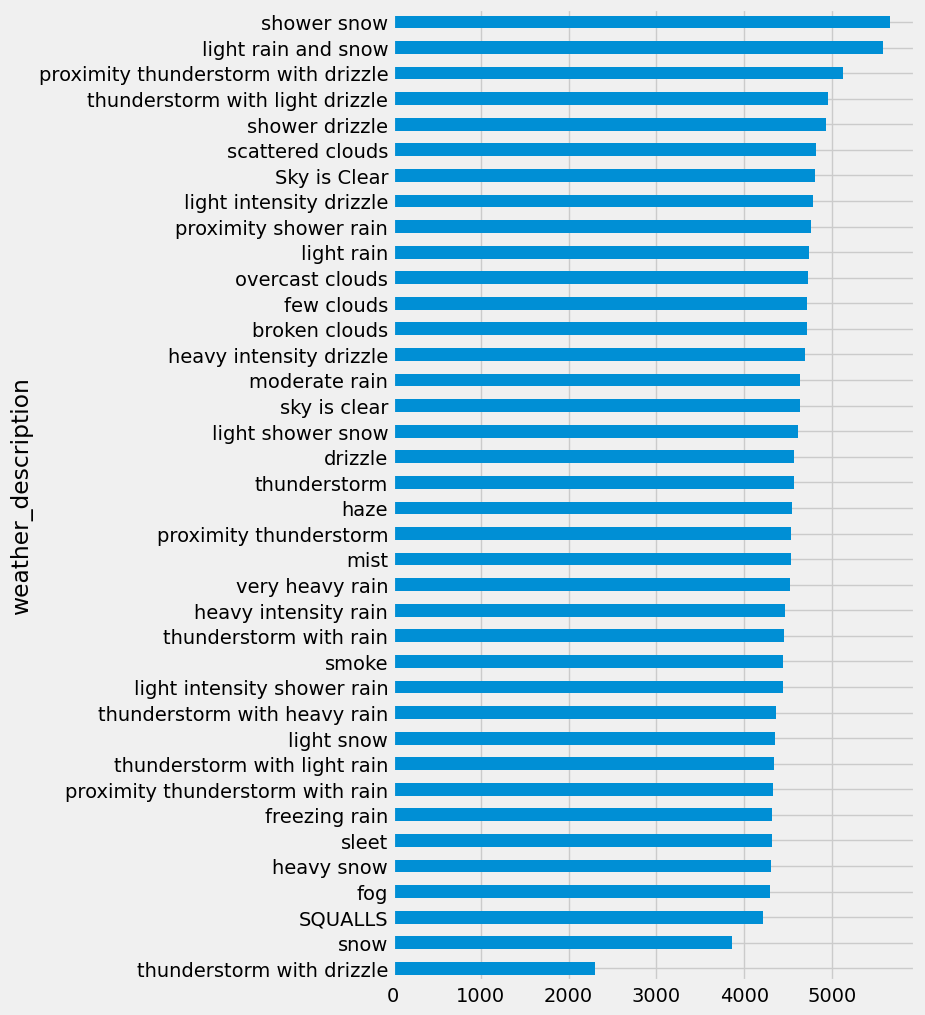

In [ ]:
plt.figure(figsize=(6,12))
by_weather_description['traffic_volume'].sort_values().plot.barh()
plt.grid(True)

Observations:
- snow showers / light snow/rain / promximity of thunderstorms show average traffic volumes > 5000 cars/hr
- thunderstorm with drizzle shows the lowest traffic volume of 2.200 cars/hr


# Conclusion Daytime data

Observing that the highest traffic occured during day time, we split off the night time related data of  data set.
<br>
The detailed analysis was then carried out on the daytime related traffic
<br>

The daily traffic has been analyzed with respect to the following time influences [month - day of the week - hour].<br>
- MONTH -- we have observed more traffic during warmer month (MAR-OCT), as well as some seasonal/holiday slumps in JUL/DEC/JAN
- DAY OF WEEK -- business days show heavier traffic with pronounced peaks aroung rush hours (7/16h). Especially versus the end of week WED/THU. During weekends the traffic roughly 30% lower then on business days and does not show any particular peaks
- HOUR -- We observe two peaks of the traffic volume during business days at 7h and 16h.

<br>
The daily traffic was then analyzed against weather related signals that were as well contained in the data set. 
<br>
None of the direct weather signals was proven to show a relation with traffic volume (remp,rain_1h, snow_1h,clouds_all)
<br>
Where as in the weather description, we could extract three weather situations in which average traffic volume peaked beyond 5000 cars/hr. Indicating a possible causal relation with traffic volume. Those were:
- snow showers
- light rain or snow
- proximity of thunderstorm with drizzle
<br>

Interestingly "thunderstorm with drizzle" showed the lowest average traffic volume, which could indicate that people rush home when a thunderstorm is approaching, but rather stay at home/sheltered when the thunderstorm hits "the road".

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25838 entries, 0 to 48199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              25838 non-null  object        
 1   temp                 25838 non-null  float64       
 2   rain_1h              25838 non-null  float64       
 3   snow_1h              25838 non-null  float64       
 4   clouds_all           25838 non-null  int64         
 5   weather_main         25838 non-null  object        
 6   weather_description  25838 non-null  object        
 7   date_time            25838 non-null  datetime64[ns]
 8   traffic_volume       25838 non-null  int64         
 9   month                25838 non-null  int64         
 10  dayofweek            25838 non-null  int64         
 11  hour                 25838 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.6+ MB


## NIGHT TIME DATA

Create month column to split data by month (groupby) and calculate then the average traffic per month

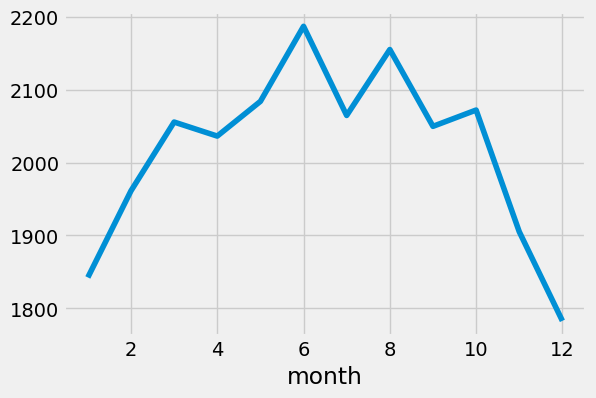

In [ ]:
night['month'] = night['date_time'].dt.month
by_month_n = night.groupby('month').mean()
by_month_n['traffic_volume'].plot()

Create dayofweek column to split data by by day of week (groupby) and calculate then the average traffic for every day of the week

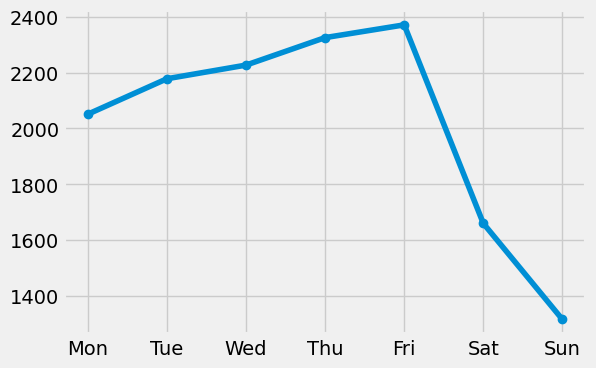

In [ ]:
night['dayofweek'] = night['date_time'].dt.dayofweek
by_dayofweek_n = night.groupby('dayofweek').mean()

wkdict = {0:'Mon',
          1:'Tue',
          2:'Wed',
          3:'Thu',
          4:'Fri',
          5:'Sat',
          6:'Sun'}

#by_dayofweek_n['traffic_volume'].plot(marker='o')
plt.figure()
plt.plot([wkdict[k] for k in by_dayofweek_n['traffic_volume'].index],
          by_dayofweek_n['traffic_volume'],'-o')
plt.grid(True)

In [ ]:
[wkdict[k] for k in by_dayofweek_n['traffic_volume'].index]

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
night['hour'] = night['date_time'].dt.hour
bussiness_days_n = night.copy()[night['dayofweek'] <= 4] # 4 == Friday
weekend_n        = night.copy()[night['dayofweek'] >= 5] # 5 == Saturday
by_hour_business_n = bussiness_days_n.groupby('hour').mean()
by_hour_weekend_n  = weekend_n.groupby('hour').mean()

print(by_hour_business_n['traffic_volume'])
print(by_hour_weekend_n['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


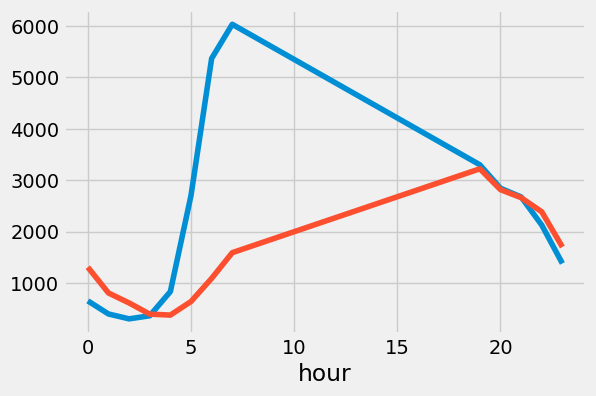

In [ ]:
plt.figure()
by_hour_business_n['traffic_volume'].plot()
by_hour_weekend_n['traffic_volume'].plot()

In [ ]:
pieces = dict(list(night.groupby(['dayofweek'])))

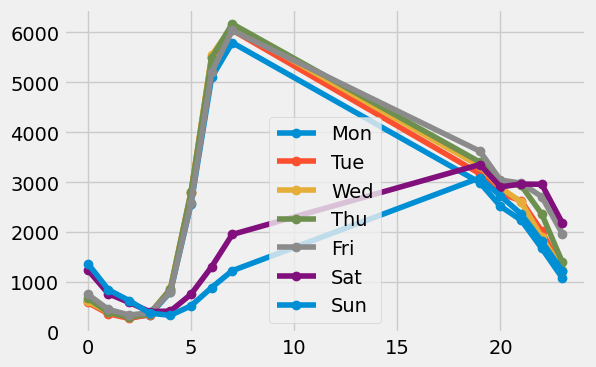

In [ ]:
wkdict = {0:'Mon',
          1:'Tue',
          2:'Wed',
          3:'Thu',
          4:'Fri',
          5:'Sat',
          6:'Sun'}

plt.figure()
for k in pieces:
    plt.plot(pieces[k].groupby('hour').mean()['traffic_volume'],'-o',label=wkdict[k])
    #plt.plot(pieces[k].groupby['hour'].mean()['traffic_volume'],label=k)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
by_weather_main_n        = night.groupby('weather_main').mean()
by_weather_description_n = night.groupby('weather_description').mean()

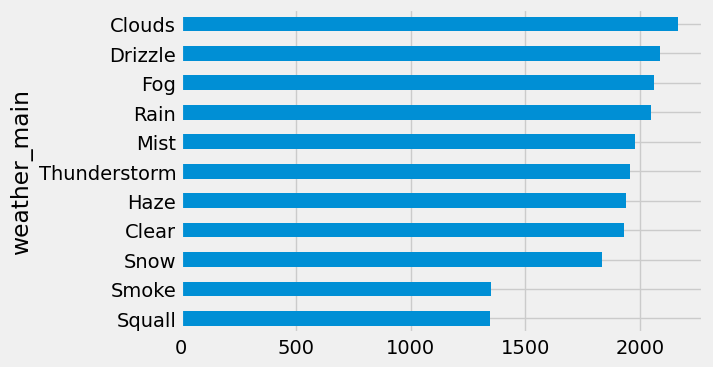

In [ ]:
by_weather_main_n['traffic_volume'].sort_values().plot.barh()
plt.grid(True)

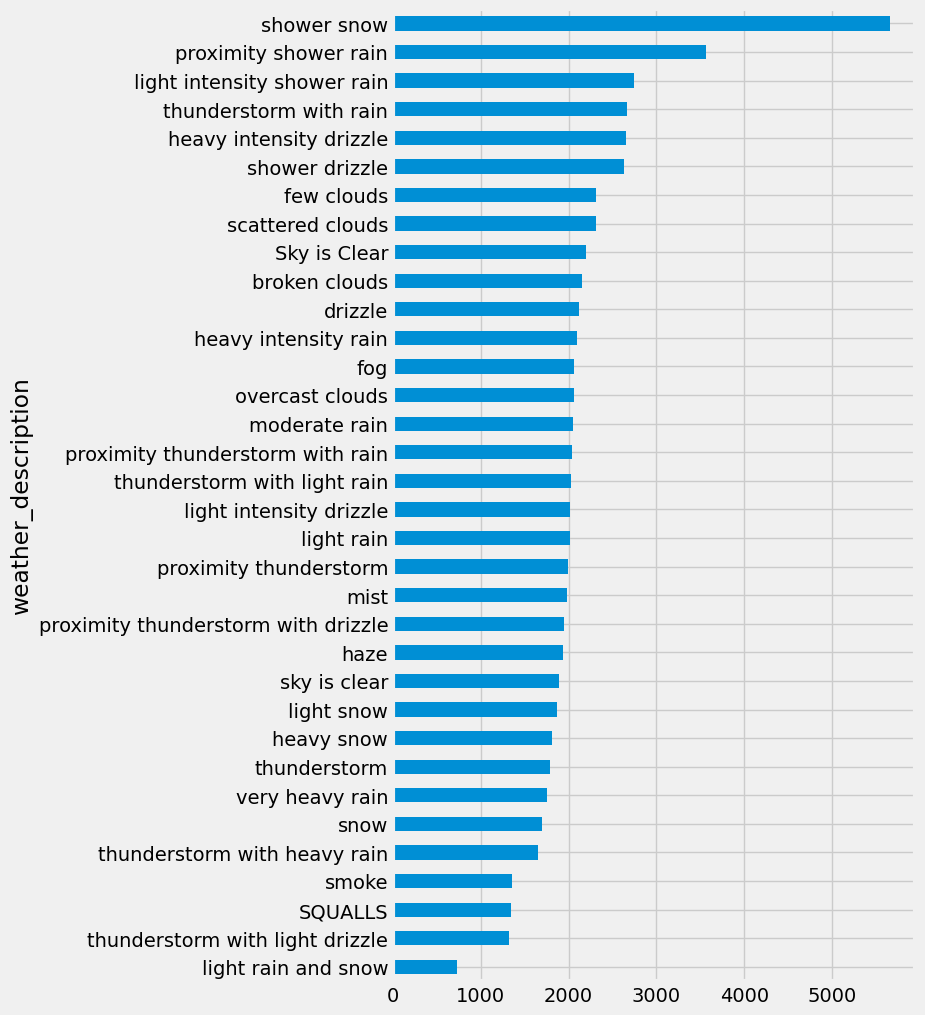

In [ ]:
plt.figure(figsize=(6,12))
by_weather_description_n['traffic_volume'].sort_values().plot.barh()
plt.grid(True)

# Conclusion Night time Traffic

Observing that the highest traffic occured during day time, we split off the night time related data of  data set.
<br>
The second detailed analysis was then carried out on the nighttime related traffic
<br>

The nighttime traffic has been analyzed with repsect to the same time influences [month - day of the week - hour] as the daytime data.<br>
- MONTH -- we have observed more traffic during warmer month (MAY-SEPT), as well as some seasonal/holiday slumps in JUL/DEC/JAN
- DAY OF WEEK -- business days show heavier traffic continually increasing from MON-FRI (peaking on friday night)
- HOUR -- We observe highest traffic during outgoing rushhour ~19h. The traffic continually decreases over the night, starting to raise again ~4.30h

<br>
The daily traffic was then analyzed against weather related signals that were as well contained in the data set. 
<br>
All direct weather signals have shown similar levels of traffic volume ,but smoke/squall showed detectable lower traffic levels ~20%
<br>
The weather description has two weather situations in which average traffic volume peaks beyond 2000 cars/hr. Indicating a possible causal relation with traffic volume. Those were:
- snow showers
- proximity of shower rain
Exceptional low traffic volume <1000 cars/hr  was observed for "light snow and rain showers".